<a href="https://colab.research.google.com/github/Mayur-Bk/Credit-risk-analysis/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
import os
import time

In [2]:
print ("Program is running......")
print()
start_time = time.time()

Program is running......



##### load the dataset

In [3]:
a1 = pd.read_excel("/credit_risk_file_1.xlsx")

In [4]:
a2 = pd.read_excel("/credit_risk_file_2.xlsx")

In [5]:
df1 = a1.copy()
df2 = a2.copy()

In [6]:
df1

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [7]:
df2

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


#### remove nulls

In [8]:
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [9]:
df1.shape

(51296, 26)

In [10]:
    columns_to_be_removed = []
for i in df2.columns:
        if df2.loc[df2[i] == -99999].shape[0] > 10000:
                columns_to_be_removed .append(i)

In [11]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [12]:
for i in df2.columns:
    df2 = df2.loc[df2[i] != -99999]

In [13]:
df2.shape

(42066, 54)

##### dissolving null values

In [14]:
df1.isna().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [15]:
df2.isna().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

#### merging df1 & df2 (checking for common column names)

In [16]:
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [17]:
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [18]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [20]:
df.isna().sum().sum()

0

In [21]:
df.shape

(42064, 79)

Visualizations


 Distribution of Numerical Features

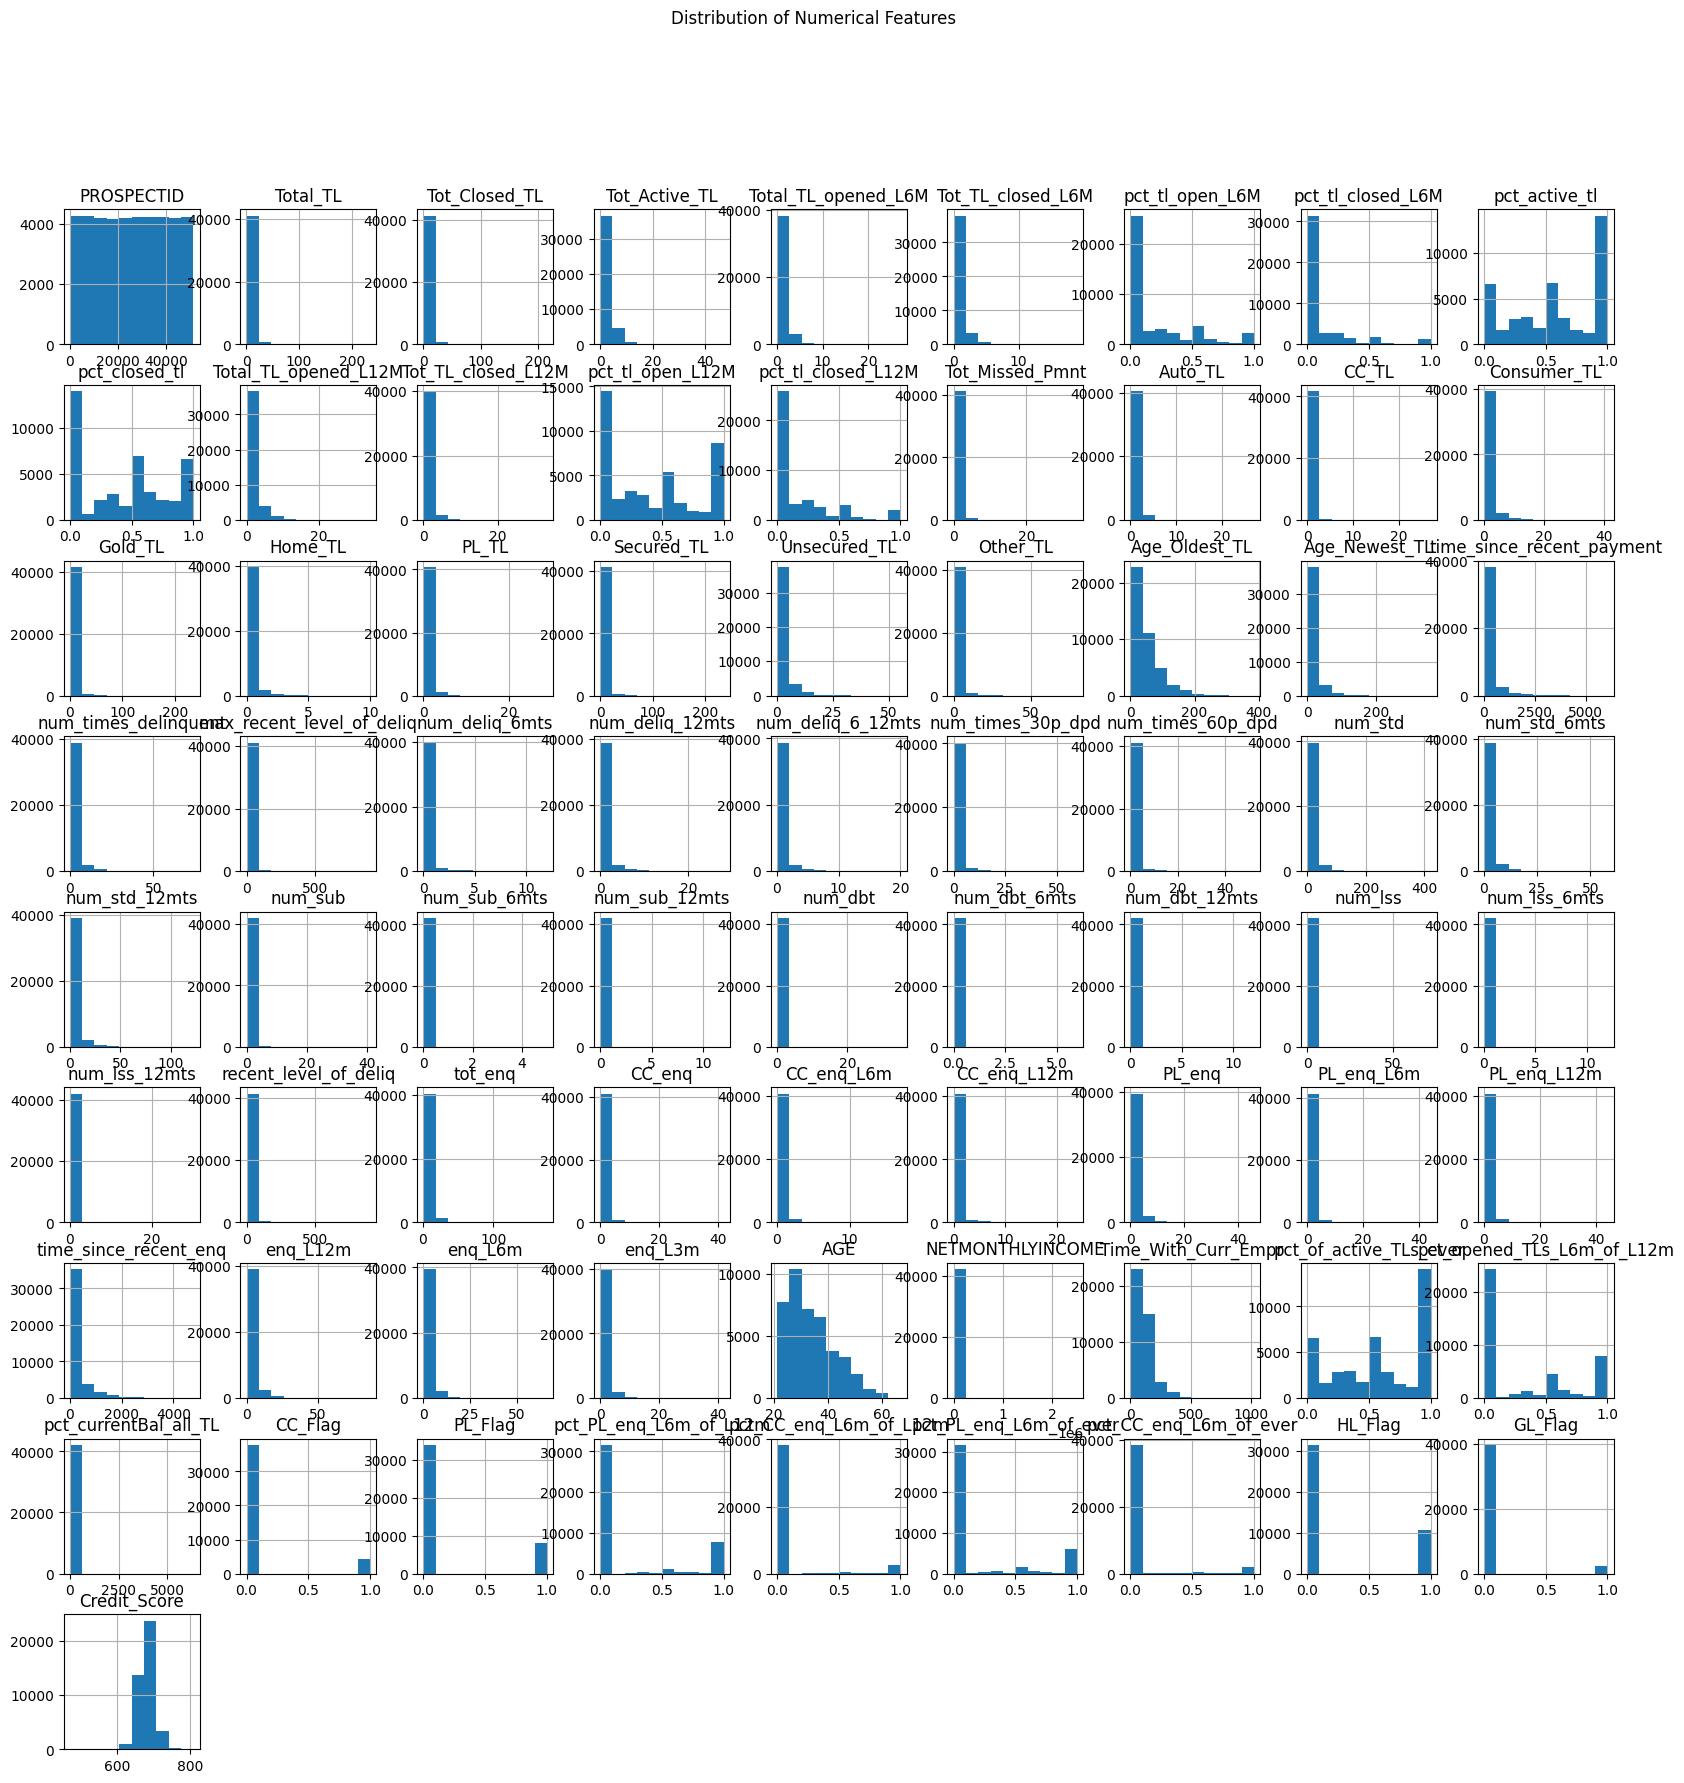

In [22]:
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(20, 20))
plt.suptitle('Distribution of Numerical Features')
plt.show()

 Correlation Matrix

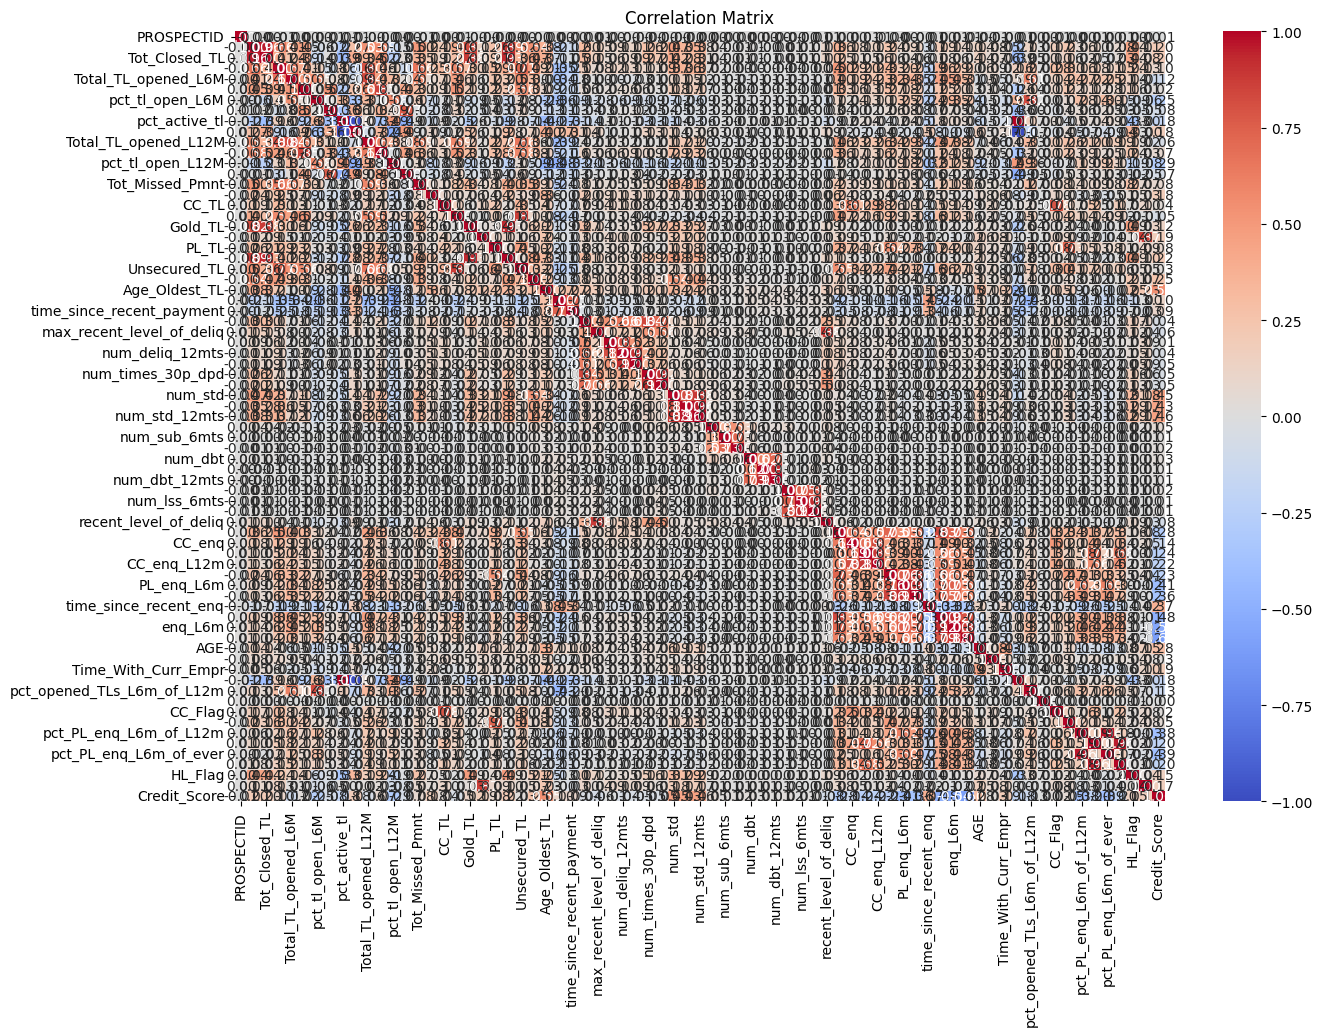

In [23]:
plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

 Class Distribution of Categorical Features

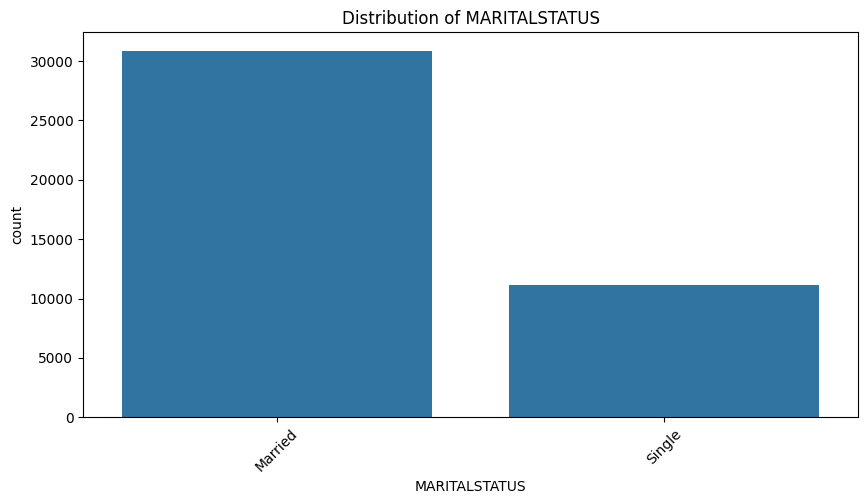

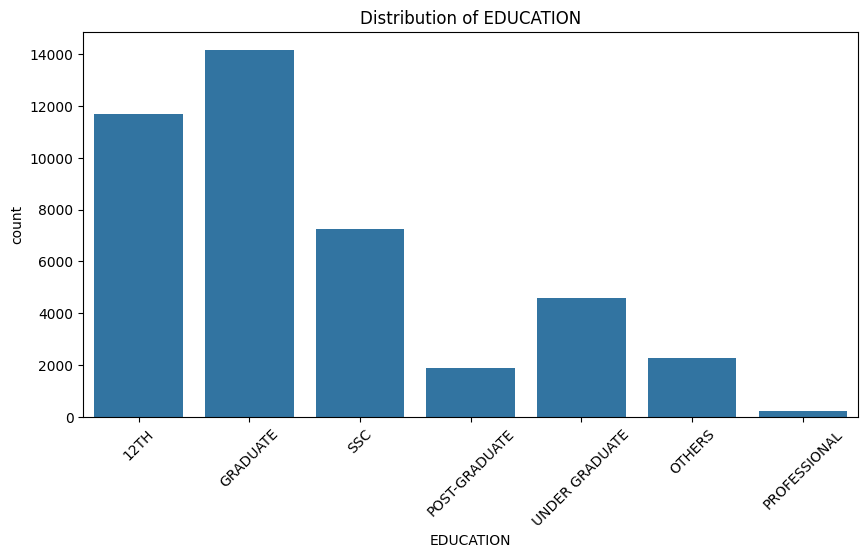

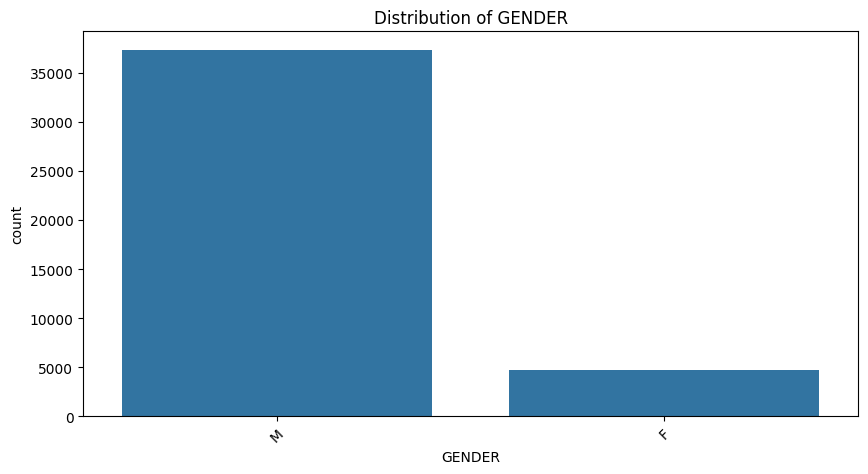

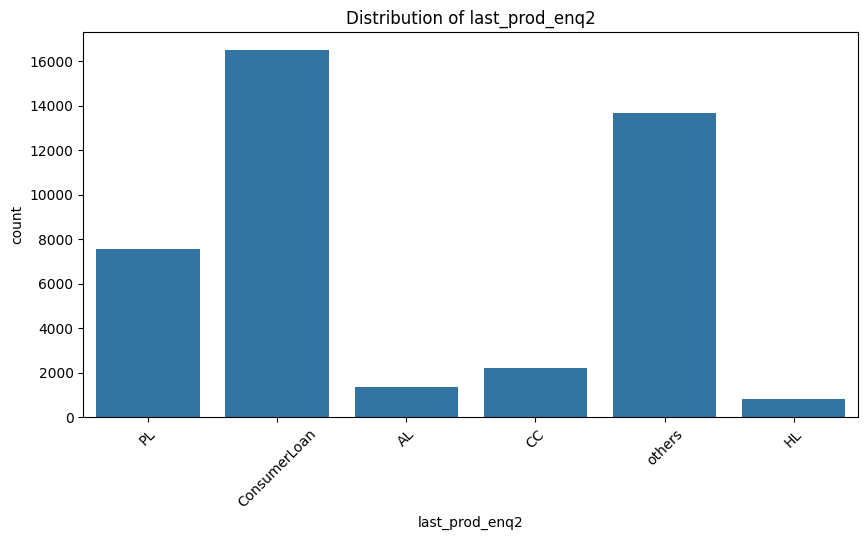

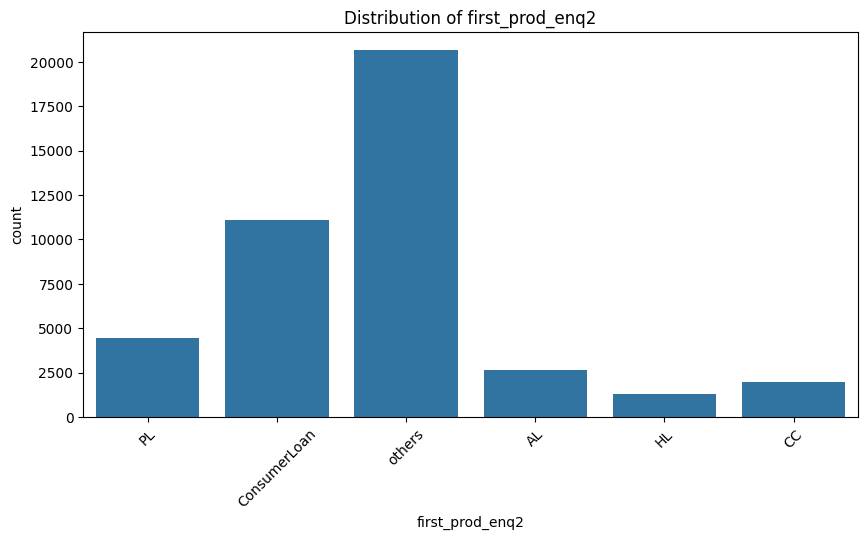

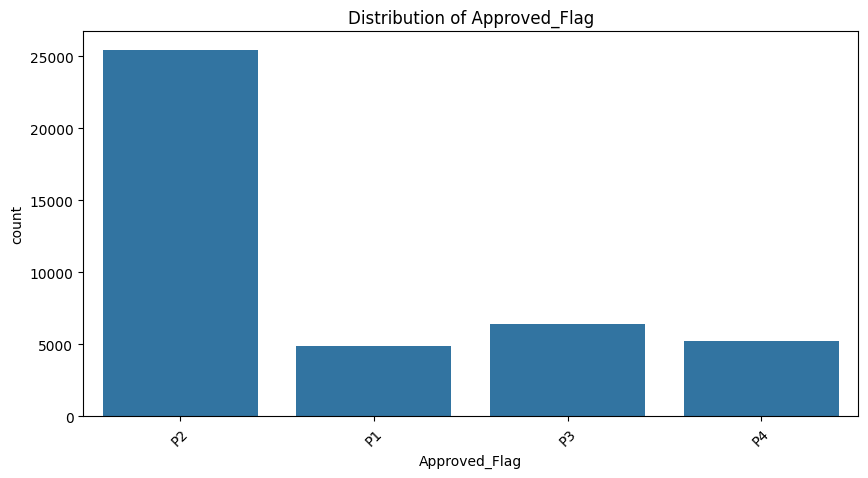

In [24]:
categorical_features = df.select_dtypes(include=[object]).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

##### check how many columns are categorical

In [25]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)


MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [26]:
df['MARITALSTATUS'].value_counts()

MARITALSTATUS
Married    30886
Single     11178
Name: count, dtype: int64

In [27]:
df['EDUCATION'].value_counts()


EDUCATION
GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: count, dtype: int64

In [28]:
df['GENDER'].value_counts()


GENDER
M    37345
F     4719
Name: count, dtype: int64

In [29]:
df['last_prod_enq2'].value_counts()


last_prod_enq2
ConsumerLoan    16480
others          13653
PL               7553
CC               2195
AL               1353
HL                830
Name: count, dtype: int64

In [30]:
df['first_prod_enq2'].value_counts()


first_prod_enq2
others          20640
ConsumerLoan    11075
PL               4431
AL               2641
CC               1988
HL               1289
Name: count, dtype: int64

In [31]:
df['Approved_Flag'].value_counts()

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

#### chi square testing

In [32]:
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)


MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


#### since the pvalue is <= 0.05 [or 5%] we'll accept all

#### vif for numeric columns

In [33]:

numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)


In [34]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0



for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1

    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.832800792153077
3 --- 6.099653381646723
3 --- 5.581352009642766
4 --- 1.985584353098778


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.80953830281934
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.384346405965583
7 --- 3.0646584155234238
8 --- 2.898639771299251
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721434


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427238
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.6233975535272274
21 --- 2.2959970812106176
22 --- 7.360578319196446
22 --- 2.1602387773102567
23 --- 2.8686288267891467
24 --- 6.458218003637272
24 --- 2.8474118865638247
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808678
26 --- 2.3804746142952653
27 --- 8.60951347651454
27 --- 13.06755093547673
27 --- 3.500040056654653
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.10485591513649
30 --- 2.7971639638512924
31 --- 3.424171203217696
32 --- 10.175021454450922
32 --- 6.408710354561292
32 --- 1.001151196262563
33 --- 3.069197305397273
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.8331649740532

#### perform annova check for the columns to be kept

In [35]:


columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)


#### listing all the final features

In [36]:

features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

#### Label encoding for the categorical features

In [37]:

['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

In [38]:
df['MARITALSTATUS'].unique()

array(['Married', 'Single'], dtype=object)

In [39]:
df['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [40]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [41]:
df['last_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'AL', 'CC', 'others', 'HL'], dtype=object)

In [42]:
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [43]:
df.shape

(42064, 43)

In [44]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [45]:
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

<ipython-input-45-c1e7fd256653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].astype(int)


In [46]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])


In [47]:
df_encoded.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

##### Machine Learning model fitting

#### Random Forest

In [48]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)

In [51]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [52]:
y_pred = rf_classifier.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


Accuracy: 0.7636990372043266



In [54]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469203

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.8569075937785909

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



#### XG boost

In [55]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

In [56]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [57]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


In [59]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()


Accuracy: 0.78



In [61]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

In [62]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



#### Decision Tree

In [63]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()


Accuracy: 0.71



In [67]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

In [68]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.7246804326450345
Recall: 0.7268244575936884
F1 Score: 0.7257508616445102

Class p2:
Precision: 0.8094867807153966
Recall: 0.8253716551040634
F1 Score: 0.8173520463244675

Class p3:
Precision: 0.3412509897070467
Recall: 0.32528301886792454
F1 Score: 0.3330757341576507

Class p4:
Precision: 0.6552072800808898
Recall: 0.6297376093294461
F1 Score: 0.6422200198216056



since XGboost is giving me best result, we shall further finetune it.

Apply standard scalar

In [69]:
columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

In [70]:
for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

In [71]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

In [72]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [73]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


In [75]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [77]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

In [78]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660173

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665036

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.3749428440786465

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



No improvement in metrices

Hyperparameter tuning in xgboost

In [79]:

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

Define the XGBClassifier with the initial set of hyperparameters

In [80]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

Define the parameter grid for hyperparameter tuning


In [81]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}


In [82]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Print the best hyperparameters

In [83]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


Evaluate the model with the best hyperparameters on the test set

In [84]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7811719957209081


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Based on risk appetite of the bank, you will suggest P1,P2,P3,P4 to the business end user


Hyperparameter tuning for xgboost (Used in the session)
Define the hyperparameter grid

In [85]:
param_grid = {
   'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
   'learning_rate'   : [0.001, 0.01, 0.1, 1],
   'max_depth'       : [3, 5, 8, 10],
   'alpha'           : [1, 10, 100],
   'n_estimators'    : [10,50,100]
 }

In [86]:
index = 0

In [87]:
answers_grid = {
     'combination'       :[],
     'train_Accuracy'    :[],
     'test_Accuracy'     :[],
     'colsample_bytree'  :[],
     'learning_rate'     :[],
     'max_depth'         :[],
     'alpha'             :[],
     'n_estimators'      :[]
     }

Loop through each combination of hyperparameters

In [88]:
for colsample_bytree in param_grid['colsample_bytree']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for alpha in param_grid['alpha']:
                for n_estimators in param_grid['n_estimators']:
                    index = index + 1

Define and train the XGBoost model

In [89]:
model = xgb.XGBClassifier(objective='multi:softmax',
                                        num_class=4,
                                        colsample_bytree = colsample_bytree,
                                        learning_rate = learning_rate,
                                        max_depth = max_depth,
                                        alpha = alpha,
                                        n_estimators = n_estimators)

In [90]:
 y = df_encoded['Approved_Flag']
 x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [91]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [93]:
 model.fit(x_train, y_train)

XGBClassifier(alpha=100, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

Predict on training and testing sets

In [94]:
 y_pred_train = model.predict(x_train)
 y_pred_test = model.predict(x_test)

Calculate train and test results

In [95]:
train_accuracy =  accuracy_score (y_train, y_pred_train)
test_accuracy  =  accuracy_score (y_test , y_pred_test)

Include into the lists

In [96]:
answers_grid['combination'].append(index)
answers_grid['train_Accuracy'].append(train_accuracy)
answers_grid['test_Accuracy'].append(test_accuracy)
answers_grid['colsample_bytree'].append(colsample_bytree)
answers_grid['learning_rate'].append(learning_rate)
answers_grid['max_depth'].append(max_depth)
answers_grid['alpha'].append(alpha)
answers_grid['n_estimators'].append(n_estimators)

Print results for this combination

In [97]:
print(f"Combination {index}")
print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy : {test_accuracy :.2f}")
print("-" * 30)

Combination 720
colsample_bytree: 0.9, learning_rate: 1, max_depth: 10, alpha: 100, n_estimators: 100
Train Accuracy: 0.79
Test Accuracy : 0.77
------------------------------


NOW using XGBOOST for Unseen Data

Load unseen dataset


In [98]:
a3 = pd.read_excel("/Unseen_Dataset.xlsx")

In [99]:
cols_in_df = list(df.columns)

In [100]:
cols_in_df.pop(42)

'Approved_Flag'

In [101]:
df_unseen = a3 [cols_in_df]

In [102]:
df_unseen['MARITALSTATUS'].unique()

array(['Married', 'Single'], dtype=object)

In [103]:
df_unseen['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS'], dtype=object)

In [104]:
df_unseen['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [105]:
df_unseen['last_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'AL', 'CC', 'others', 'HL'], dtype=object)

In [106]:
df_unseen['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [107]:
df_unseen.loc[df_unseen['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df_unseen.loc[df_unseen['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df_unseen.loc[df_unseen['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df_unseen.loc[df_unseen['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df_unseen.loc[df_unseen['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df_unseen.loc[df_unseen['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df_unseen.loc[df_unseen['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [108]:
df_unseen['EDUCATION'].value_counts()
df_unseen['EDUCATION'] = df_unseen['EDUCATION'].astype(int)
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            100 non-null    float64
 1   pct_tl_closed_L6M          100 non-null    float64
 2   Tot_TL_closed_L12M         100 non-null    int64  
 3   pct_tl_closed_L12M         100 non-null    float64
 4   Tot_Missed_Pmnt            100 non-null    int64  
 5   CC_TL                      100 non-null    int64  
 6   Home_TL                    100 non-null    int64  
 7   PL_TL                      100 non-null    int64  
 8   Secured_TL                 100 non-null    int64  
 9   Unsecured_TL               100 non-null    int64  
 10  Other_TL                   100 non-null    int64  
 11  Age_Oldest_TL              100 non-null    int64  
 12  Age_Newest_TL              100 non-null    int64  
 13  time_since_recent_payment  100 non-null    int64  


In [109]:
df_encoded_unseen = pd.get_dummies(df_unseen, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [110]:
df_encoded_unseen.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               100 non-null    float64
 1   pct_tl_closed_L6M             100 non-null    float64
 2   Tot_TL_closed_L12M            100 non-null    int64  
 3   pct_tl_closed_L12M            100 non-null    float64
 4   Tot_Missed_Pmnt               100 non-null    int64  
 5   CC_TL                         100 non-null    int64  
 6   Home_TL                       100 non-null    int64  
 7   PL_TL                         100 non-null    int64  
 8   Secured_TL                    100 non-null    int64  
 9   Unsecured_TL                  100 non-null    int64  
 10  Other_TL                      100 non-null    int64  
 11  Age_Oldest_TL                 100 non-null    int64  
 12  Age_Newest_TL                 100 non-null    int64  
 13  time_s

In [111]:
model = xgb.XGBClassifier(objectives='multi:softmax',
                                         num_class=4,
                                colsample_bytree=0.9,
                                     learning_rate=1,
                                         max_depth=3,
                                            alpha=10,
                                    n_estimators=100)

In [112]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:55:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "objectives" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

In [113]:
y_pred_unseen = model.predict(df_encoded_unseen)

In [114]:
a3['Target_Variable'] = y_pred_unseen

In [115]:
a3.to_excel ("/Final_Predictations.xlsx", index=False)

feature importances for illustration

In [116]:
feature_importances = np.random.rand(len(df.columns))
feature_importances_df = pd.DataFrame({'Feature': df.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

Feature Importances

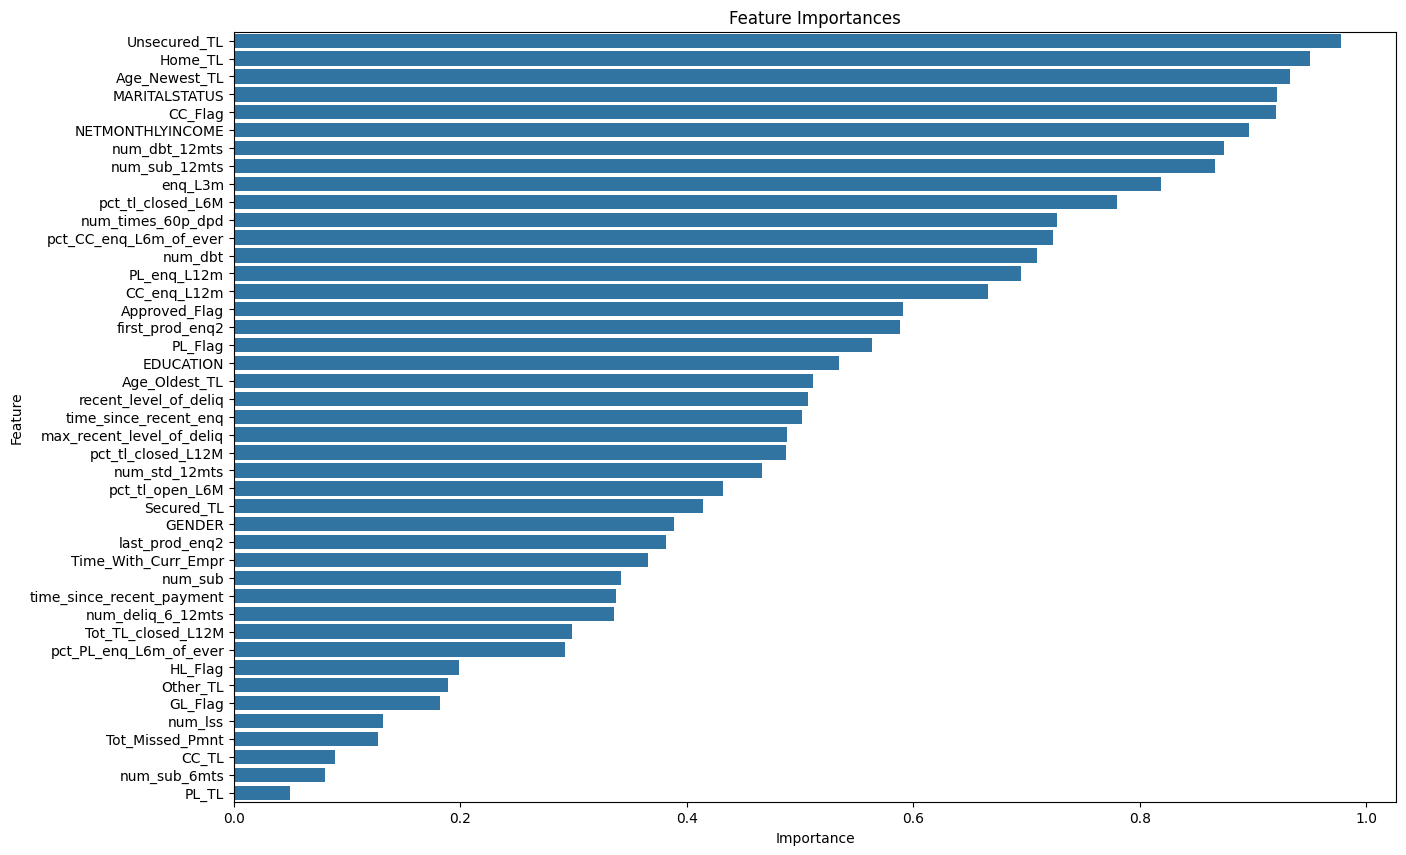

In [117]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

Print Runtime

In [118]:
end_time = time.time()
elapsed_time = end_time - start_time
print ("Total run time of the prgram- " + str (round(elapsed_time,2)) + ' sec')

Total run time of the prgram- 473.25 sec


In [119]:
input('Press Enter to exit')

Press Enter to exit


''